# STAT 207 Lab 8: Inference for Associations - [25 total points] - Solutions

Due: Wednesday, March 31 11:59pm CST



## <u>Case Study 1</u>: U.S Unemployment Rates and Metropolitan Areas
In this lab we will explore the statistical concepts that we've learned this week while also examining the RELATIONSHIP between **unemployment rates** and **whether the county is a metropolitan county or not** in the U.S. 

The **metro** variable indicates "yes" if the county is a metropolitan area and indicates "no" otherwise.

## <u>Case Study 2</u>: U.S Median Education Levels and Metropolitan Areas
Also in this lab we will explore the statistical concepts that we've learned this week while also examining the RELATIONSHIP between **median educataion level** and **whether the county is a metropolitan county or not** in the U.S. 

### Imports

In [2]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style
import numpy as np

## 1. <u>Preliminaries</u>

### 1.1 [0.5pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

Remember that 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [3]:
df = pd.read_csv('county.csv', na_values=['data unavailable'])         #read the file
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


### 1.2 [0.5pt] Create a dataframe that is just comprised of the metro variable,  the unemployment rates variable, and the median_edu variable. Then drop all missing values from this dataframe.

In [4]:
data_set = df[['metro','unemployment_rate','median_edu']].dropna()
data_set.head()

,metro,unemployment_rate,median_edu
0,yes,3.86,some_college
1,yes,3.99,some_college
2,no,5.90,hs_diploma
3,yes,4.39,hs_diploma
4,yes,4.02,hs_diploma


### 1.3 [0.5pt] How many counties are metropolitan counties and how many are not?

In [5]:
data_set['metro'].value_counts()

no     1974
yes    1165
Name: metro, dtype: int64

### 1.4 [0.5pt] Next, split this dataframe into two population dataframes:
1. <u>Population 1</u>:the counties that are metropolitan areas
2. <u>Population 2</u>:the counties that are not metropolitan areas


In [6]:
population1 = data_set[data_set['metro']=='yes']

In [7]:
population2 = data_set[data_set['metro']=='no']

### 1.5 [0.5pt] Calculate the mean and standard deviation unemployment rates for these two populations.

In [8]:
mean1_p1 = population1.mean()
std1_p1 = population1.std()

In [9]:
print('for population 1\n', 'mean:',mean1_p1, 'std:', std1_p1)

for population 1
 mean: unemployment_rate    4.397957
dtype: float64 std: unemployment_rate    1.29918
dtype: float64


In [10]:
mean1_p2 = population2.mean()
std1_p2 = population2.std()

In [11]:
print('for population 2\n', 'mean:',mean1_p2, 'std:', std1_p2)

for population 2
 mean: unemployment_rate    4.737437
dtype: float64 std: unemployment_rate    1.812452
dtype: float64


### 1.6 [0.5pt] Finally, calculate the proportion of counties in the metro population that have a median education level of high school diploma and  calculate the proportion of counties in the non-metro population that have a median education level of high school diploma.

In [12]:
m1 = population1[population1['median_edu']=='hs_diploma']
prob1 = m1.shape[0]/population1.shape[0]
prob1

0.26781115879828327

In [13]:
m2 = population2[population2['median_edu']=='hs_diploma']
prob2 = m2.shape[0]/population2.shape[0]
prob2

0.549645390070922

## 2. Numerical Sample Analysis

### 2.1 [1 pt] Collect a random sample of 40 metropolitan counties (using a random state of 100 without replacement) and do the following.
a. calculate the sample mean and standard deviation of the unemployment rate

b. plot the sample distribution of unemployment rates.

In [14]:
sample1 = population1.sample(40,replace = False, random_state = 100)

In [15]:
mean2_1 = sample1['unemployment_rate'].mean()
mean2_1

4.58225

In [16]:
std2_1 = sample1['unemployment_rate'].std()
std2_1

1.2359995176747873

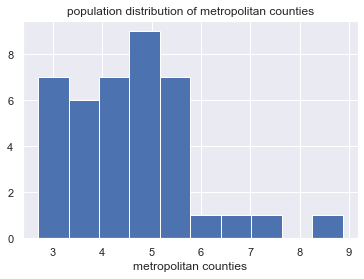

In [17]:
sample1.hist()
plt.title('population distribution of metropolitan counties')
plt.xlabel('metropolitan counties')
plt.show()

### 2.2 [1 pt] Collect a random sample of 50 non-metropolitan counties (using a random state of 100 without replacement) and do the following.
a. calculate the sample mean and standard deviation of the unemployment rate

b. plot the sample distribution of unemployment rates.

In [18]:
sample2 = population2.sample(50,replace = False, random_state = 100)

In [19]:
mean2_2 = sample2['unemployment_rate'].mean()
mean2_2

4.567400000000001

In [20]:
std2_2 = sample2['unemployment_rate'].std()
std2_2

1.454124057812883

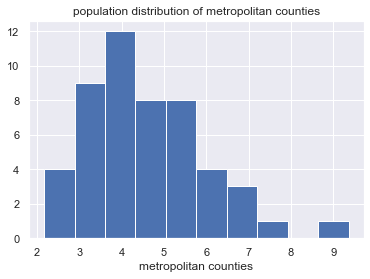

In [21]:
sample2.hist()
plt.title('population distribution of metropolitan counties')
plt.xlabel('metropolitan counties')
plt.show()

## 3. Sampling Distribution (of sample mean differences) Analysis

Assume that you have access to the populations you created in #1 in this part.

### 3.1 [1 pt] Calculate the mean and standard deviation of the sampling distribution of sample mean differences (ie. $\bar{x}_{metro}-\bar{x}_{nonmetro}$ values)

In [22]:
mean3_1= mean1_p1 - mean1_p2
mean3_1

unemployment_rate   -0.33948
dtype: float64

In [23]:
std3_1 = np.sqrt((std1_p1**2/40)+(std1_p2**2/50))
std3_1

unemployment_rate    0.328476
dtype: float64

### 3.2 [1 pt] Using the sample mean values $\bar{x}_{metro}$ and $\bar{x}_{nonmetro}$ that you calculated in #2, calculate the z-score of  $(\bar{x}_{metro}-\bar{x}_{nonmetro})$.

In [24]:
from scipy.stats import norm
critical_value = ((mean2_1-mean2_2)-mean3_1)/std3_1
critical_value

unemployment_rate    1.078708
dtype: float64

## 4. Association Testing for Metro Areas and Unemployment Rate

**<font color="green">Now, assume that we do not know anything about the populations from #1.</font>**

We would like to test if there is an association between whether or not a county is a metropolitan area and the unemployment rate. Or in other words, we would like to see if we have enough evidence to suggest that the mean unemployment rate of all metropolitan counties is different from the mean unemployment rate of all non-metropolitan counties.

We will use the two samples we collected from #2 to help us conduct this test.

### 4.1 [1 pt] Set up the hypotheses for this test.

    null: mean unemployment rate of all metropolitan counties - mean unemployment rate of all non-metropolitan counties = 0
    hypothses: mean unemployment rate of all metropolitan counties - mean unemployment rate of all non-metropolitan counties =! 0

### 4.2 [2 pt] Check the conditions for conducting inference on these hypotheses.

1. the condition is indepedent: because the both sample size(40,50) is less than 10% of the data size (1165,2974)
2. n1 =40 > 30, n2 = 50 >30

In [25]:
population2.shape[0]

1974

### 4.3 [1.5 pt] Calculate a 90% confidence interval for $\mu_{metro}-\mu_{nonmetro}$.

**Note:** You should use the most *accurate* way of calulating this confidence interval that we know now.

In [26]:
from scipy.stats import t
df = min(sample1.shape[0]-1, sample2.shape[0]-1)
c_v = t.ppf(0.95, df)

In [27]:
p_e = mean2_1-mean2_2
p_e

0.014849999999999142

In [28]:
std_error = np.sqrt((std2_1**2/40)+(std2_2**2/50))
std_error

0.2836933303807331

In [29]:
lower = p_e - c_v * std_error
upper = p_e + c_v * std_error
print("Lower bound is", lower,'\n', 'Upper bound is' , upper)

Lower bound is -0.46313783392585367 
 Upper bound is 0.49283783392585195


### 4.4 [1 pt] Use this 90% confidence interval to make a conclusion about your hypotheses.

since the null difference 0 is between -0.45 and 0.48. We fail to reject the null hypotheses. And we say that we do not have have sufficient evidence to suggest the alternative test(mean unemployment rate of all metropolitan counties - mean unemployment rate of all non-metropolitan counties =! 0)

### 4.5 [1.5 pt] Calculate the p-value for this hypothesis test.

**Note:** You should use the most *accurate* way of calulating this p-value that we know now.

In [30]:
t_s = (p_e - 0)/std_error
p_value = 2 * (1-t.cdf(np.abs(t_s),df))
print(p_value)

0.9585207989519997


### 4.6 [1 pt] Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.10$.

since the p-value = 0.958 > 𝛼=0.10
so we fail to reject the null hypotheses. And we say that we do not have sufficient evidence to suggest the alternative test(mean unemployment rate of all metropolitan counties - mean unemployment rate of all non-metropolitan counties =! 0)

## 5. Categorical Samples Analysis

### [0.5 pt] 5.1 Using your metro and non-metro samples from #2, do the following.
a. calculate the proportion of counties in the metro sample in which the a median education level is a high school diploma.

b. calculate the proportion of counties in the nonmetro sample in which the a median education level is a high school diploma.

In [31]:
prop_5a = sample1[sample1['median_edu']=='hs_diploma'].shape[0] / 40
prop_5a

0.375

In [32]:
prop_5b = sample2[sample2['median_edu']=='hs_diploma'].shape[0] / 50
prop_5b

0.56

## 6. Sampling Distribution (of Sample Proportion Differences) Analysis

Assume that you have access to the populations you created in #1 in this part.

### 6.1 [1 pt] Calculate the mean and standard deviation of the sampling distribution of sample proportion differences (ie. $\hat{p}_{metro}-\hat{p}_{nonmetro}$ values)

In [33]:
mean6_1 = prob1 - prob2
mean6_1

-0.2818342312726387

In [34]:
std6_2 = np.sqrt((prob1*(1-prob1)/40)+(prob2*(1-prob2)/50))
std6_2

0.0992618519645348

### 6.2 [1 pt] Using the sample proportion values $\hat{p}_{metro}$ and $\hat{p}_{nonmetro}$ that you calculated in #2, calculate the z-score of  $(\hat{p}_{metro}-\hat{p}_{nonmetro})$.

In [35]:
critical_value = ((prop_5a-prop_5b)- mean6_1)/std6_2
critical_value

0.975543266180813

## 7. Association Testing for Metro Areas and Median Education Level

**<font color="green">Now, assume that we do not know anything about the populations from #1.</font>**

We would like to test if there is an association between whether or not a county is a metropolitan area and the median education level. Or in other words, we would like to see if we have enough evidence to suggest that the proportion of all metropolitan counties that have a median education level of high school diploma is different from the proportion of all nonmetropolitan counties that have a median education level of high school diploma.

We will use the two samples we collected from #2 to help us conduct this test.

### 7.1 [1 pt] Set up the hypotheses for this test.

    Null p(metropolitan counties that have a median education level of high school diploma) - p(non metropolitan counties that have a median education level of high school diploma) = 0
    hypothses difference is not 0

### 7.2 [2 pt] Check the conditions for conducting inference on these tests.

In [36]:
(40*prop_5a,40*(1-prop_5a))

(15.0, 25.0)

In [37]:
(50*prop_5b,50*(1-prop_5b))

(28.000000000000004, 21.999999999999996)

1. $n_1p_1\approx n_1\hat{p}= 15< 10$ and $n_1(1-p_1)\approx n_1(1-\hat{p}_1)=25 < 10$
2. $n_2p_2\approx n_2\hat{p}=28< 10$ and $n_2(1-p_2)\approx n_2(1-\hat{p}_2)=22 < 10$ 
3. Sample of republicans is randomly selected and n = 40 < 10% of database size
4. Sample of republicans is randomly selected and n = 50 < 10% of database size
5. observations in sample 1 and sample 2 are independne

### 7.3 [1.5 pt] Calculate a 88% confidence interval for $p_{metro}-p_{nonmetro}$.


In [38]:
c_v7 = norm.ppf(0.94)
c_v7

1.5547735945968535

In [39]:
p_e7 = prop_5a-prop_5b
p_e7

-0.18500000000000005

In [40]:
std_error7 = np.sqrt((prop_5a*(1-prop_5a)/40)+(prop_5b*(1-prop_5b)/50))
std_error7

0.10386228863259271

In [41]:
lower7 = p_e7 - c_v7 * std_error7
upper7 = p_e7 + c_v7 * std_error7

In [42]:
print("Lower bound is", lower7,'\n', 'Upper bound is' , upper7)

Lower bound is -0.34648234384035215 
 Upper bound is -0.02351765615964796


### 7.4 [1 pt] Use this 88% confidence interval to make a conclusion about your hypotheses.

since the null difference 0 is not between -0.346 and 0.0235. We successed reject the null hypotheses. And we say that we  have have sufficient evidence to suggest the alternative test( there are no population difference between nonmetropolitan and metropolitan counties that have a median education level of high school diploma)

### 7.5 [1.5 pt] Calculate the p-value for this hypothesis test.


In [128]:
ts_7 = p_e7 / std_error7
pvalue_7 = 2 * (1-norm.cdf(np.abs(ts_7)))
pvalue_7

0.07487901089381244

### 7.6 [0.5 pt] Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.12$.

since the p-value = 0.075 > 𝛼=0.12
so we successed to reject the null hypotheses. And we say that we have sufficient evidence to suggest the alternative test(there are no population difference between nonmetropolitan and metropolitan counties that have a median education level of high school diploma)